<a href="https://colab.research.google.com/github/Lorenaps/educacao-brasileira/blob/main/cadernos/matriculas_por_dependencia_adm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Matrículas por Dependência Administrativa

> *Como se divide a cobertura da educação básica entre os tipos de escola Federal, Estadual, Municipal, e Privada?*

*Trazendo as ferramentas necessárias*

In [3]:
import pandas as pd
import altair as alt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Importando a base de dados do censo que comprreende os anos de 2007 até 2022.*

> Os dados foram unificados anteriormente [nesse caderno](https://github.com/Lorenaps/educacao-brasileira/blob/main/etl/censo_escolar.ipynb).

In [6]:
%%time

censo = pd.read_csv('/content/drive/MyDrive/dados/output/baseCensoEscolar_230524.csv', encoding='utf-8')
censo.head(5)

CPU times: user 12.7 s, sys: 5.24 s, total: 17.9 s
Wall time: 24.2 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_BAS,IN_INF,IN_INF_CRE,IN_INF_PRE,IN_FUND,IN_FUND_AI,IN_FUND_AF,IN_MED,IN_PROF,IN_PROF_TEC,IN_EJA,IN_EJA_FUND,IN_EJA_MED,IN_ESP,IN_ESP_CC,IN_ESP_CE,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EIEEF HAP BITT TUPARI,11022558,2,NaN,2,2.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,CEEJA LUIZ VAZ DE CAMOES,11024275,2,NaN,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,200.0,3.0,114.0,86.0,0.0,53.0,5.0,132.0,0.0,10.0,15.0,0.0,0.0,0.0,10.0,0.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMMEF 7 DE SETEMBRO,11024291,3,NaN,2,0.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF ANA NERY,11024372,3,NaN,1,0.0,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,118.0,17.0,101.0,0.0,0.0,0.0,0.0,1.0,53.0,65.0,13.0,15.0,6.0,62.0,0.0,22.0,8.0,1.0,7.0,0.0,8.0,7.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF BOA ESPERANCA,11024666,3,NaN,2,0.0,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,161.0,18.0,143.0,0.0,0.0,0.0,0.0,3.0,76.0,85.0,9.0,59.0,2.0,91.0,0.0,0.0,20.0,1.0,19.0,0.0,9.0,8.0,0.0


De acordo ao Dicionário de Dados disponível no conjunto de dados do Censo Escolar 2022 do INEP, algumas colunas que que vamos precisar olhar para responder essa pergunta são:

- TP_DEPENDENCIA: Que descreve a Dependência Administrativa e tem como referência os valores (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada);
- QT_MAT_BAS: Que descreve o Número de Matrículas na Educação Básica;
- IN_BAS: Que descreve se existe uma ou mais matrículas para Educação Básica (0 - Não, 1 - Sim);
- TP_SITUACAO_FUNCIONAMENTO: Situação de funcionamento (1 - Em Atividade, 2 - Paralisada, 3 - Extinta (ano do Censo), 4 - Extinta em Anos Anteriores)

*Filtrando os registros do censo que tratam das escolas ativas e que possuem 1 ou mais matrículas na Educação Básica:*

In [23]:
dados = censo.loc[(censo['TP_SITUACAO_FUNCIONAMENTO'] == 1) & (censo['IN_BAS'] == 1)]

*Agrupando os dados por dependência administrativa:*

In [34]:
dados = censo[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO']]
dados[['TP_DEPENDENCIA', 'QT_MAT_BAS',]].groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)

,TP_DEPENDENCIA,QT_MAT_BAS
2,3,374078519.0
1,2,283157756.0
3,4,133283903.0
0,1,5101413.0


*Agora vamos substituir os valores de referência das dependências pelo seus significados:*

In [35]:
dados.dtypes

TP_DEPENDENCIA      int64
QT_MAT_BAS        float64
NU_ANO_CENSO        int64
dtype: object

In [36]:
dados.loc[dados['TP_DEPENDENCIA'] == 1, ['TP_DEPENDENCIA']] = 'Federal'
dados.loc[dados['TP_DEPENDENCIA'] == 2, ['TP_DEPENDENCIA']] = 'Estadual'
dados.loc[dados['TP_DEPENDENCIA'] == 3, ['TP_DEPENDENCIA']] = 'Municipal'
dados.loc[dados['TP_DEPENDENCIA'] == 4, ['TP_DEPENDENCIA']] = 'Privada'

dados[['TP_DEPENDENCIA', 'QT_MAT_BAS',]].groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)

,TP_DEPENDENCIA,QT_MAT_BAS
2,Municipal,374078519.0
0,Estadual,283157756.0
3,Privada,133283903.0
1,Federal,5101413.0


*Para visualizarmos a distribuição das matrículas ao longo dos anos podemos agrupar os dados da seguinte forma:*

In [37]:
dados.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values(['NU_ANO_CENSO', 'QT_MAT_BAS'], ascending=False)

,TP_DEPENDENCIA,NU_ANO_CENSO,QT_MAT_BAS
47,Municipal,2022,23240028.0
15,Estadual,2022,14761395.0
63,Privada,2022,9000046.0
31,Federal,2022,380605.0
46,Municipal,2021,23135793.0
14,Estadual,2021,15019116.0
62,Privada,2021,8136345.0
30,Federal,2021,377147.0
45,Municipal,2020,22898611.0
13,Estadual,2020,15199500.0


*Para melhorar o nosso entendimento vamos adicionar uma visualização de dados usando a biblioteca [Vega-Altair](https://altair-viz.github.io/getting_started/overview.html):*

In [38]:
dados = dados.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)
dados.head(3)

,TP_DEPENDENCIA,NU_ANO_CENSO,QT_MAT_BAS
32,Municipal,2007,24531011.0
33,Municipal,2008,24500852.0
34,Municipal,2009,24315309.0


In [39]:
alt.Chart(dados).mark_line(point=True).encode(
    x=alt.X('NU_ANO_CENSO:N', title='Ano'),
    y=alt.Y('QT_MAT_BAS', title='Matrículas'),
    color=alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
).interactive()

alt.Chart(...)

**Observações iniciais:** *A rede municipal segue ao longo dos anos como a principal responsável pela formação dos jovens da educação básica. Mas é interessante observar a queda de matrículas na rede estadual e até mesmo na municipal em alguns anos (2011 a 2014) ao passo que as matrículas foram aumentando na rede privada, inclusive seu novo pico com a retomada das aulas presenciais em 2022. É interessante fazer uma complementação dessas observações com outras referências e fontes de análise*.

> Captura de tela do resultado do gráfico gerado anteriormente, para o caso de haver erro na rederização do caderno (jupyter notebok).

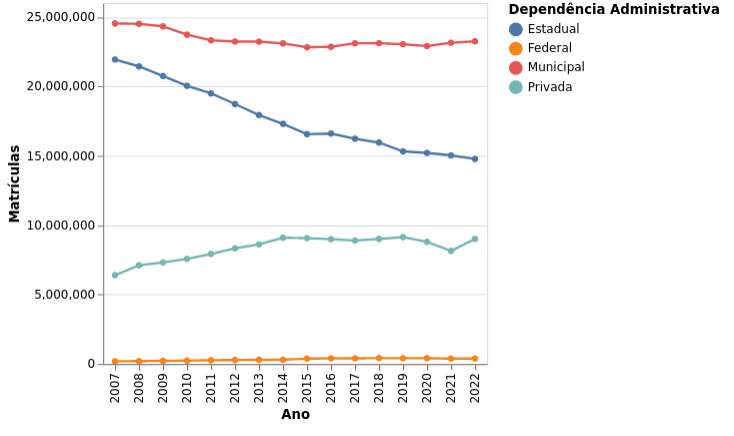